# Loan Default Prediction Project using Classification Algorithms
In this lab, you will be working on a dataset that contains financial and credit-related data for borrowers, classified as either "Fully Paid" or "Defaulted." Your task is to perform classification using Random Forest and Support Vector Machines (SVM) with hyperparameter tuning. You will complete several tasks to clean, preprocess, and analyze the data. Finally, you’ll evaluate the models' performance.

# Goal: 
To understand how to apply classification algorithms and perform model evaluation for predicting loan defaults.

# Dataset:loan.csv 
This dataset includes the following columns:

loan_amnt: The total loan amount requested by the borrower.
term: The loan repayment term (in months).
int_rate: The interest rate of the loan.
annual_inc: The annual income of the borrower.
dti: The debt-to-income ratio.
loan_status: The classification of the loan (Fully Paid or Defaulted).

# import libraries

In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

# load dataset

In [2]:
data = pd.read_csv('loan.csv')
data.head(10)

C:\Users\wiipl\AppData\Local\Temp\ipykernel_19536\2455432800.py:1: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('loan.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,5550,5550,5550.0,36 months,15.02,192.45,C,C3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,2000,2000,2000.0,36 months,17.97,72.28,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,6000,6000,6000.0,36 months,13.56,203.79,C,C1,...,NaN,NaN,DirectPay,N,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,6000,6000,6000.0,36 months,14.47,206.44,C,C2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Define the updated relevant columns
relevant_columns = [
    'loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment',
    'annual_inc', 'dti', 'revol_bal', 'revol_util',
    'inq_last_6mths', 'open_acc', 'total_acc', 'loan_status'
]


In [4]:
# Subset dataset to keep only relevant columns
data_cleaned = data[relevant_columns]

In [5]:
# Handle missing values
data_cleaned.fillna(data_cleaned.median(numeric_only=True), inplace=True)

C:\Users\wiipl\AppData\Local\Temp\ipykernel_19536\2457588955.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned.fillna(data_cleaned.median(numeric_only=True), inplace=True)


In [6]:
# Display the cleaned dataset
print("Cleaned Dataset Shape:", data_cleaned.shape)
print(data_cleaned.head())

Cleaned Dataset Shape: (2260668, 13)
   loan_amnt  funded_amnt        term  int_rate  installment  annual_inc  \
0       2500         2500   36 months     13.56        84.92     55000.0   
1      30000        30000   60 months     18.94       777.23     90000.0   
2       5000         5000   36 months     17.97       180.69     59280.0   
3       4000         4000   36 months     18.94       146.51     92000.0   
4      30000        30000   60 months     16.14       731.78     57250.0   

     dti  revol_bal  revol_util  inq_last_6mths  open_acc  total_acc  \
0  18.24       4341        10.3             1.0       9.0       34.0   
1  26.52      12315        24.2             0.0      13.0       44.0   
2  10.51       4599        19.1             0.0       8.0       13.0   
3  16.74       5468        78.1             0.0      10.0       13.0   
4  26.35        829         3.6             0.0      12.0       26.0   

  loan_status  
0     Current  
1     Current  
2     Current  
3     Cur

In [7]:
# Convert 'term' column to numeric
if 'term' in data_cleaned.columns:
    data_cleaned['term'] = data_cleaned['term'].str.extract('(\d+)').astype(int)

C:\Users\wiipl\AppData\Local\Temp\ipykernel_19536\2697405775.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['term'] = data_cleaned['term'].str.extract('(\d+)').astype(int)


In [8]:
# Ensure 'loan_status' exists in the dataset
if 'loan_status' not in data_cleaned.columns:
    raise KeyError("'loan_status' column is missing in the dataset.")

In [9]:
# Map 'loan_status' to binary target variable
loan_status_mapping = {
    'Fully Paid': 0,
    'Charged Off': 1,
    'Default': 1,
    'Current': None,  # Exclude 'Current' loans
    'Late (31-120 days)': 1,
    'Late (16-30 days)': 1,
    'In Grace Period': 1,
    'Does not meet the credit policy. Status:Fully Paid': 0,
    'Does not meet the credit policy. Status:Charged Off': 1
}
data_cleaned['loan_status_binary'] = data_cleaned['loan_status'].map(loan_status_mapping)

C:\Users\wiipl\AppData\Local\Temp\ipykernel_19536\2157656935.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['loan_status_binary'] = data_cleaned['loan_status'].map(loan_status_mapping)


In [10]:
# Drop rows with missing target values
data_cleaned = data_cleaned.dropna(subset=['loan_status_binary'])

In [31]:
# Visualization: Default Rates by Interest Rate Range
data_cleaned['int_rate_bins'] = pd.qcut(data_cleaned['int_rate'], q=5)  # Divide into 5 bins
default_rate_by_int_rate = data_cleaned.groupby('int_rate_bins')['loan_status_binary'].mean()


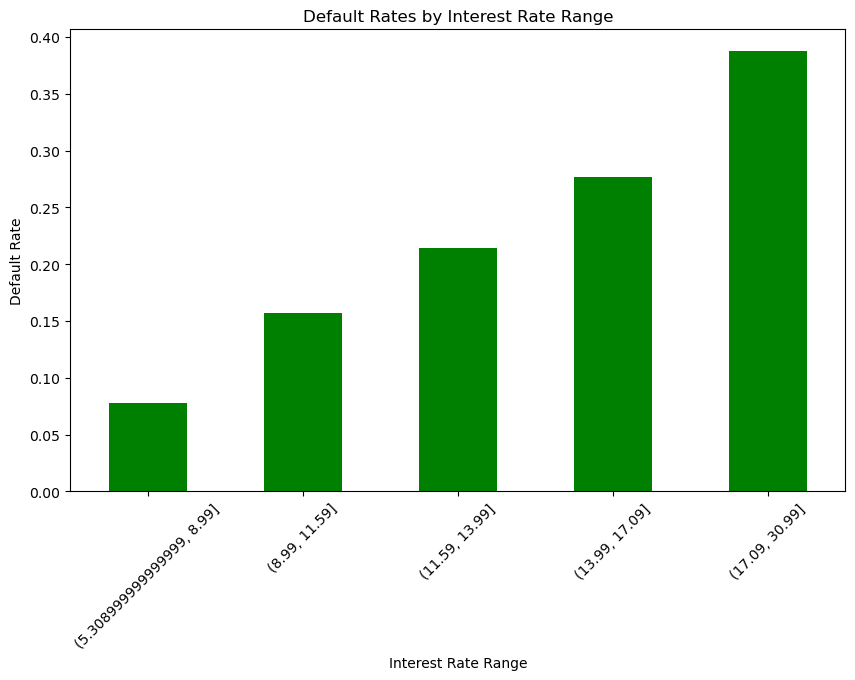

In [32]:
# Plot the default rates
plt.figure(figsize=(10, 6))
default_rate_by_int_rate.plot(kind='bar', color='green')
plt.title("Default Rates by Interest Rate Range")
plt.xlabel("Interest Rate Range")
plt.ylabel("Default Rate")
plt.xticks(rotation=45)
plt.show()

In [33]:
# Define features and target
X = data_cleaned.drop(columns=['loan_status_binary', 'loan_status'])
y = data_cleaned['loan_status_binary']

In [12]:
# Confirm data consistency
print("Final columns in data_cleaned:", data_cleaned.columns)
print("Unique values in 'loan_status_binary':", y.unique())

Final columns in data_cleaned: Index(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment',
       'annual_inc', 'dti', 'revol_bal', 'revol_util', 'inq_last_6mths',
       'open_acc', 'total_acc', 'loan_status', 'loan_status_binary'],
      dtype='object')
Unique values in 'loan_status_binary': [0. 1.]


In [13]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:

# Display dataset shapes
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)

Training Features Shape: (938681, 12)
Testing Features Shape: (402292, 12)


In [15]:
# GridSearchCV for RandomForestClassifier
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=2, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 24 candidates, totalling 48 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             scoring='accuracy', verbose=2)

In [19]:
# Display best parameters
print("Best Parameters from GridSearchCV:", grid_search.best_params_)

Best Parameters from GridSearchCV: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [20]:
# Use the best model
best_rf = grid_search.best_estimator_

In [22]:
# Evaluate the RandomForestClassifier
y_pred = best_rf.predict(X_test) 
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.99      0.88    313124
         1.0       0.57      0.05      0.08     89168

    accuracy                           0.78    402292
   macro avg       0.68      0.52      0.48    402292
weighted avg       0.74      0.78      0.70    402292



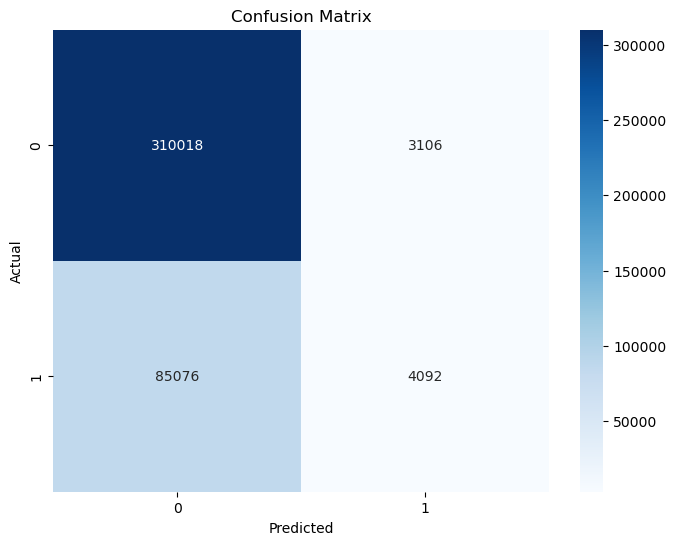

In [23]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

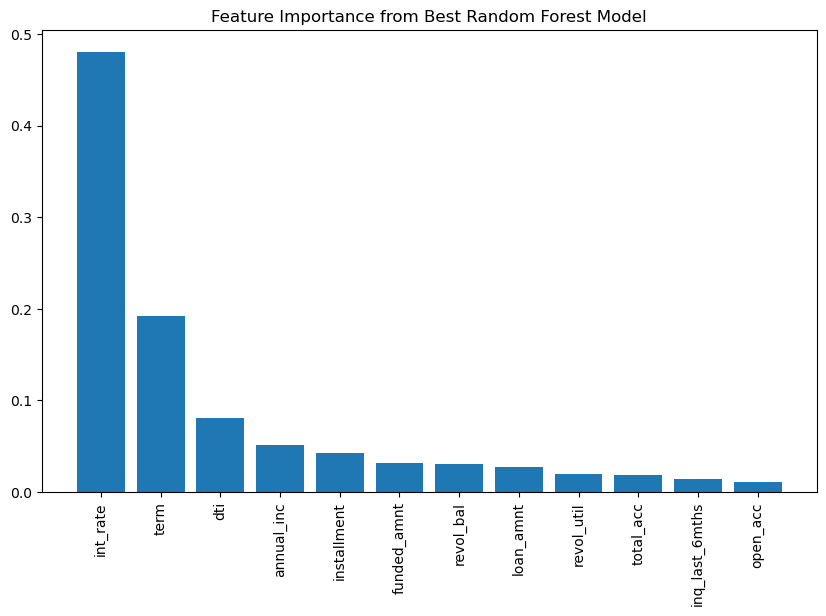

In [25]:
# Feature Importance using the best model from GridSearchCV
feature_importance = best_rf.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]

# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importance[sorted_idx], align='center')
plt.xticks(range(X.shape[1]), X.columns[sorted_idx], rotation=90)
plt.title("Feature Importance from Best Random Forest Model")
plt.show()

In [26]:
# Build a simple deep learning model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

C:\Users\wiipl\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [28]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32)

Epoch 1/20
29334/29334 ━━━━━━━━━━━━━━━━━━━━ 30s 984us/step - accuracy: 0.6691 - loss: 58.5001 - val_accuracy: 0.7783 - val_loss: 0.5293
Epoch 2/20
29334/29334 ━━━━━━━━━━━━━━━━━━━━ 28s 962us/step - accuracy: 0.7780 - loss: 0.5294 - val_accuracy: 0.7784 - val_loss: 0.5290
Epoch 3/20
29334/29334 ━━━━━━━━━━━━━━━━━━━━ 29s 970us/step - accuracy: 0.7780 - loss: 0.5295 - val_accuracy: 0.7784 - val_loss: 0.5291
Epoch 4/20
29334/29334 ━━━━━━━━━━━━━━━━━━━━ 28s 967us/step - accuracy: 0.7785 - loss: 0.5289 - val_accuracy: 0.7784 - val_loss: 0.5290
Epoch 5/20
29334/29334 ━━━━━━━━━━━━━━━━━━━━ 28s 963us/step - accuracy: 0.7780 - loss: 0.5295 - val_accuracy: 0.7784 - val_loss: 0.5290
Epoch 6/20
29334/29334 ━━━━━━━━━━━━━━━━━━━━ 28s 965us/step - accuracy: 0.7784 - loss: 0.5289 - val_accuracy: 0.7784 - val_loss: 0.5290
Epoch 7/20
29334/29334 ━━━━━━━━━━━━━━━━━━━━ 29s 981us/step - accuracy: 0.7786 - loss: 0.5287 - val_accuracy: 0.7784 - val_loss: 0.5290
Epoch 8/20
29334/29334 ━━━━━━━━━━━━━━━━━━━━ 29s 987us/

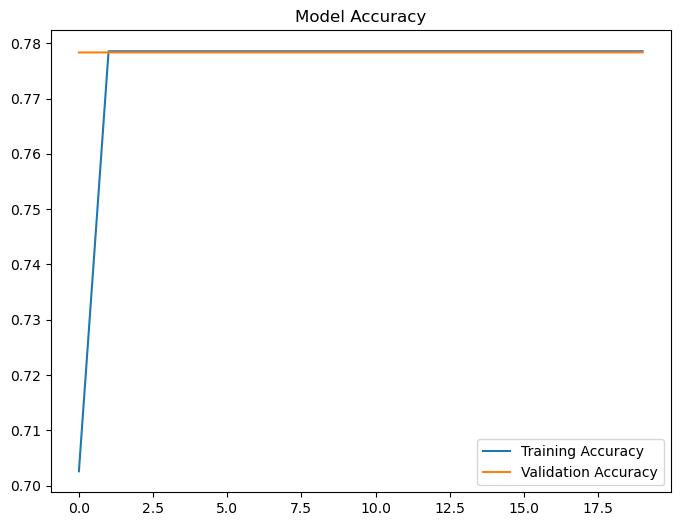

In [29]:
# Plot training history
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

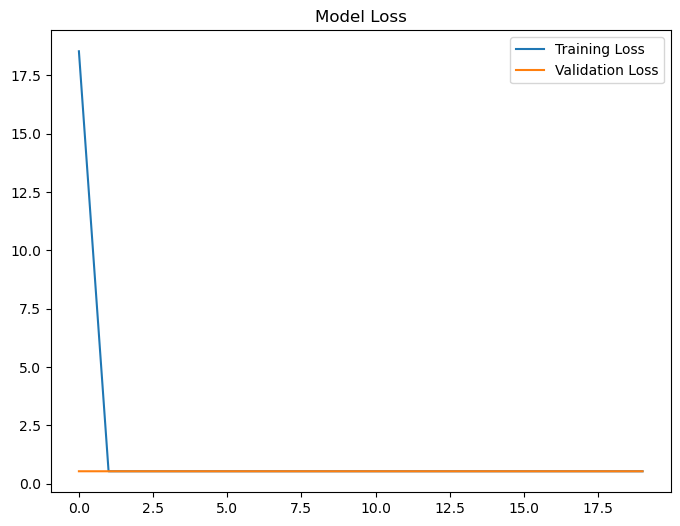

In [30]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.legend()
plt.show()

In [34]:
results = pd.DataFrame(grid_search.cv_results_)
results.to_csv("grid_search_results.csv", index=False)


In [35]:
best_params = grid_search.best_params_
with open("best_hyperparameters.txt", "w") as file:
    file.write(str(best_params))
